# Regression of Used Car Prices

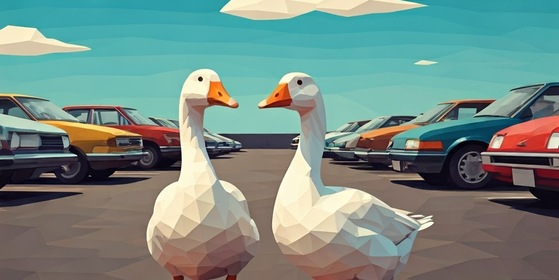

## 1. 대회 설명

- 중고차의 다양한 속성을 기반으로 차량 가격 예측

## 2. 데이터

- **`train.csv`**: 학습용 데이터; `price` 열이 예측 대상(연속형 값)
- **`test.csv`**: 테스트 데이터; 각 행의 차량 가격(`price`)을 예측하는 것이 목표
- **`used_cars.csv`**: 원본 데이터로; 중고차 관련 상세 정보
    - **Brand & Model**: 차량 제조사 및 모델명
    - **Model Year**: 제조 연도
    - **Mileage**: 차량의 주행거리(마일리지).
    - **Fuel Type**: 가솔린, 디젤, 전기, 하이브리드 등.
    - **Engine Type**: 성능 및 연비 관련 정보.
    - **Transmission**: 자동, 수동 등 변속기 종류.
    - **Exterior & Interior Colors**: 차량의 외부 및 내부 색상.
    - **Accident History**: 사고 또는 손상 여부.
    - **Clean Title**: 차량의 소유권 관련 문제 유무.
    - **Price**: 각 차량의 판매 가격.

## 3. 성능 평가 방식 이해

- **Root Mean Squared Error (RMSE)**
    - 𝑦𝑖 : 실제값
    - 𝑦ˆ𝑖 : 예측값
    
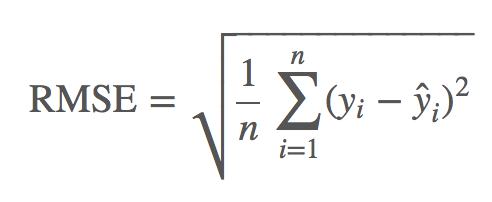

- 각 테스트 데이터의 `id`와 예측한 `price` 값을 포함해야 하며, 예시는 다음과 같음 :
    
    ```
    id,price
    188533,43878.016
    188534,43878.016
    188535,43878.016
    etc.
    ```

## ⚙️ 패키지

### 📍 Autogluon 라이브러리

- AutoML 라이브러리로, 여러 모델을 학습하고 성능을 비교해줌 

*결과 예시)*

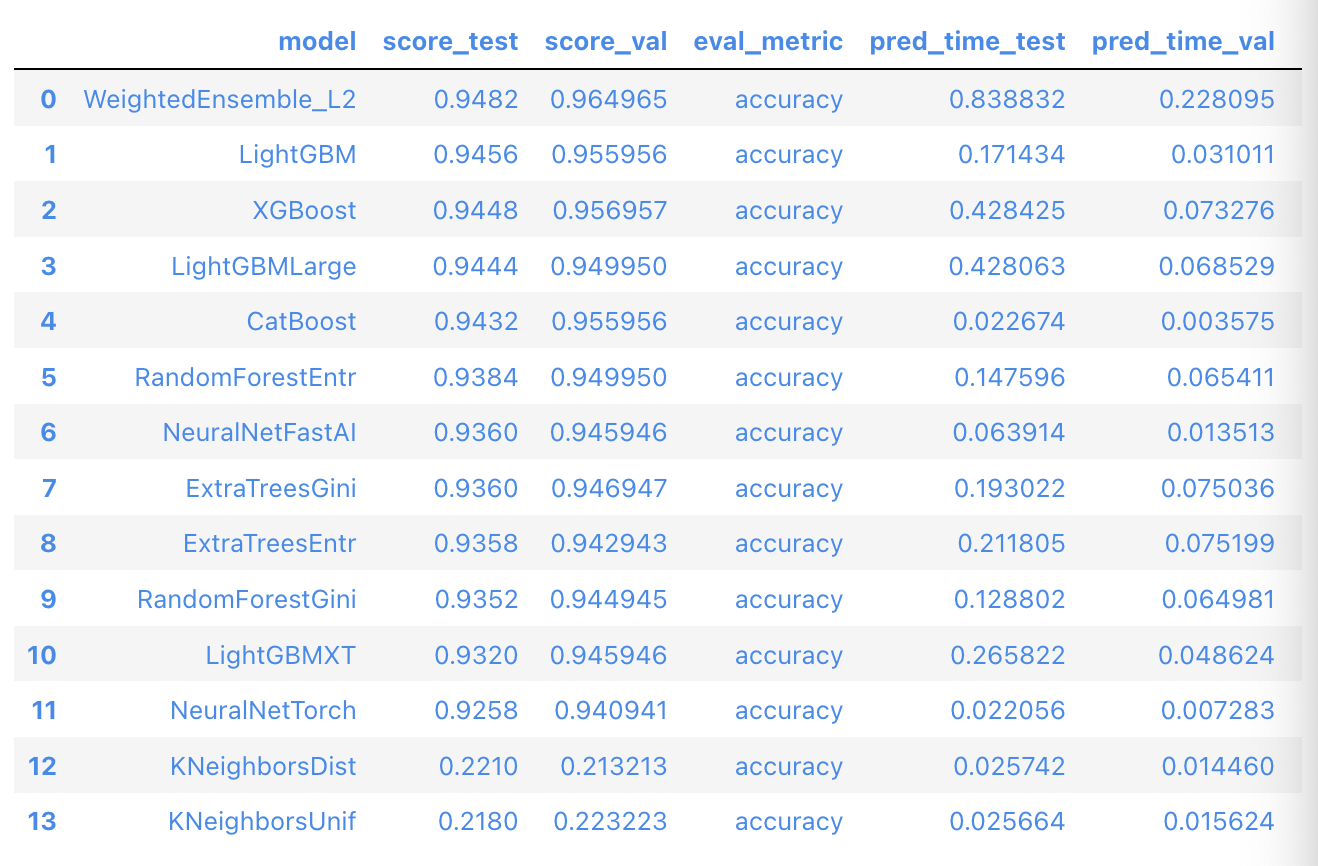

In [1]:
# !pip install -U autogluon

  Obtaining dependency information for autogluon from https://files.pythonhosted.org/packages/8d/fe/68319a9a9c9479536d16c82ad402628fab2c41fdfe83677fddce961b1061/autogluon-1.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.core[all]==1.2 from https://files.pythonhosted.org/packages/e7/5d/a4d08081f66def32c2c04c691cae0a4cfa1a2f717b4828cf0a69cfbd16d9/autogluon.core-1.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.features==1.2 from https://files.pythonhosted.org/packages/ef/6e/a3c151f0ce5d19ff0818e53ec2b43ec6e0c13eefad15fe74eacf6a4a4db7/autogluon.features-1.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.tabular[all]==1.2 from https://files.pythonhosted.org/packages/68/59/8605a57f9a087efc2aa4d4022a99dfb3ed0ffcfa8df258685937c000fac7/autogluon.tabular-1.2-py3-none-any.whl.metadata
  Obtaining dependency information for autogluon.multimodal==1.2 from https://files.pythonhosted.org/packages/f9/39/3033b2c24c3

  Obtaining dependency information for timm<1.0.7,>=0.9.5 from https://files.pythonhosted.org/packages/19/0d/57fe21d3bcba4832ed59bc3bf0f544e8f0011f8ccd6fd85bc8e2a5d42c94/timm-1.0.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Obtaining dependency information for torchvision<0.21.0,>=0.16.0 from https://files.pythonhosted.org/packages/28/57/4d7ad90be612f5ac6c4bdafcb0ff13e818e14a340a88c8ca00d9ed8c2dad/torchvision-0.20.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchmetrics<1.3.0,>=1.2.0 from https://files.pythonhosted.org/packages/62/17/eedb48177a4679b75b82185492f8ad2b4d010e032fd38160e157b0e22028/torchmetrics-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for omegaconf<2.3.0,>=2.1.1 from https://files.pythonhosted.org/packages/98/c3/f00dcd6935c11555db6ad55bdada58706120974cacf9a861a7b948ea0619/omegaconf-2.2.3-py3-none-any.whl.metadata
  Obtaining dependency informati

  Obtaining dependency information for utilsforecast<0.2.5,>=0.2.3 from https://files.pythonhosted.org/packages/ac/13/793879e8c7a2766c25d56e9e9043b5224a41423979b29f00b4c60d451b03/utilsforecast-0.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for coreforecast==0.0.12 from https://files.pythonhosted.org/packages/95/c1/3b2fbcb6e92994f44279e74cad4a093679b461eed91791fd626da8c45f72/coreforecast-0.0.12-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for fugue>=0.9.0 from https://files.pythonhosted.org/packages/ec/38/46a0ef179f7279207a3263afeb8da4dd73f44d00b6cc999c96a39112d284/fugue-0.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/e8/30/35111dae435c640694d616a611b7ff6b2482cfd977f8f572ff960a321d66/optuna-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for window-ops from https://files.pythonhosted.org/packages/5b/e5/da17e2a457af1c37113d5aeb683d306e19ee15ed037

  Obtaining dependency information for py4j from https://files.pythonhosted.org/packages/10/30/a58b32568f1623aaad7db22aa9eafc4c6c194b429ff35bdc55ca2726da47/py4j-0.10.9.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/d1/0f/8910b19ac0670a0f80ce1008e5e751c4a57e14d2c4c13a482aa6079fa9d6/jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for referencing>=0.28.4 from https://files.pythonhosted.org/packages/b7/59/2056f61236782a2c86b33906c025d4f4a0b17be0161b63b70fd9e8775d36/referencing-0.35.1-py3-none-any.whl.metadata
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Obtaining dependency information for rpds-py>=0.7.1 from https://files.pythonhosted.org/packages/c8/75/68c15732293a8485d79fe4ebe9045525502a067865fa4278f178851b2d87/rpds_py-0.22.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for li

  Obtaining dependency information for py-spy>=0.2.0 from https://files.pythonhosted.org/packages/65/7c/d9e26cc4c8e91f96a3a65de04d2e2e4131fbcaf6830d10917d4fab9d6788/py_spy-0.4.0-py2.py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for opencensus from https://files.pythonhosted.org/packages/b5/ed/9fbdeb23a09e430d87b7d72d430484b88184633dc50f6bfb792354b6f661/opencensus-0.11.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for virtualenv!=20.21.1,>=20.0.24 from https://files.pythonhosted.org/packages/10/f9/0919cf6f1432a8c4baa62511f8f8da8225432d22e83e3476f5be1a1edc6e/virtualenv-20.28.0-py3-none-any.whl.metadata
  Obtaining dependency information for memray from https://files.pythonhosted.org/packages/53/ec/e5baba698b616276006a027f020d9d62ce17ea8cded8b46d422e8d0a4b62/memray-1.15.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for tensorboardX>=1.9 from https://files.pythonhosted.org/packages/44/71/f3e7c9b2ab67e28c572

  Obtaining dependency information for langcodes<4.0.0,>=3.2.0 from https://files.pythonhosted.org/packages/c3/6b/068c2ea7a712bf805c62445bd9e9c06d7340358ef2824150eceac027444b/langcodes-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for sentencepiece!=0.1.92,>=0.1.91 from https://files.pythonhosted.org/packages/de/42/ae30952c4a0bd773e90c9bf2579f5533037c886dfc8ec68133d5694f4dd2/sentencepiece-0.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
INFO: pip is looking at multiple versions of huggingface-hub[torch] to determine which version is com

  Obtaining dependency information for fs from https://files.pythonhosted.org/packages/b9/5c/a3d95dc1ec6cdeb032d789b552ecc76effa3557ea9186e1566df6aac18df/fs-2.4.16-py2.py3-none-any.whl.metadata
  Obtaining dependency information for shellingham>=1.3.0 from https://files.pythonhosted.org/packages/e0/f9/0595336914c5619e5f28a1fb793285925a8cd4b432c9da0a987836c7f822/shellingham-1.5.4-py2.py3-none-any.whl.metadata
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Obtaining dependency information for distlib<1,>=0.3.7 from https://files.pythonhosted.org/packages/91/a1/cf2472db20f7ce4a6be1253a81cfdf85ad9c7885ffbed7047fb72c24cf87/distlib-0.3.9-py2.py3-none-any.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/b9/f8/feced7779d755758a52d1f6635d990b8d98dc0a29fa568bbe0625f18fdf3/filelock-3.16.1-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpathlib<1.0.0,>=0.7.0 from https://files.pythonhosted.org

  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/41/24/0b023b6537dfc9bae2c779353998e3e99ac7dfff4222fc6126650e93c3f3/filelock-3.14.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for packaging from https://files.pythonhosted.org/packages/88/ef/eb23f262cca3c0c4eb7ab1933c3b1f03d021f2c48f54763065b6f0e321be/packaging-24.2-py3-none-any.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/3b/dd/9b84302ba85ac6d3d3042d3e8698374838bde1c386b4adb1223d7a0efd4e/pytz-2023.4-py2.py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for openxlab from https://files.pythonhosted.org/packages/e2/9c/e48f8fef4c853afa6e509782

  Obtaining dependency information for openxlab from https://files.pythonhosted.org/packages/b7/63/377ebb15d3666e5ad29bb537b8add35e174c4548466d29dd84333d5560cb/openxlab-0.0.18-py3-none-any.whl.metadata
  Obtaining dependency information for openxlab from https://files.pythonhosted.org/packages/2a/62/e6fba0be49e22accc1cb2ff007dbed43a211261acdfd7e6428710fee38dc/openxlab-0.0.17-py3-none-any.whl.metadata
  Obtaining dependency information for openxlab from https://files.pythonhosted.org/packages/4b/e2/806b08626fb1f5b4d304cfdcc80216fcc77a6e9132a00db6206e23cbfe2f/openxlab-0.0.16-py3-none-any.whl.metadata
  Obtaining dependency information for openxlab from https://files.pythonhosted.org/packages/f1/2f/ec2fa04c0b9770ef52e31ccc404ce4b9d5b9ed304e72b6bece0fc9278f5f/openxlab-0.0.15-py3-none-any.whl.metadata
  Obtaining dependency information for openxlab from https://files.pythonhosted.org/packages/10/c8/b30634f1e8c798ce6577680ff45d58e4600c8d69f6b0162c91d220075959/openxlab-0.0.14-py3-none-any.whl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 MB 8.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 10.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 8.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 10.1 MB/s eta 0:00:0000:0100:01
Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.2 MB/s eta 0:00:00
  

    Uninstalling numba-0.57.1:
      Successfully uninstalled numba-0.57.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.15.1
    Uninstalling huggingface-hub-0.15.1:
      Successfully uninstalled huggingface-hub-0.15.1
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.76
    Uninstalling botocore-1.29.76:
      Successfully uninstalled botocore-1.29.76
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers-0.13.2:
      Successfully uninstalled tokenizers-0.13.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.32.1
    Uninstalling transformers-4.32.1:
      Successfully uninstalled transformers-4.32.1
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.17.3
    Uninstalling jsonschema-4.17.3:
      Successfully uninstalled jsonschema-4.17.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
spyder 5.4.3 requires pyqt5<5.16, which is not installed.
spyder 5.4.3 requires pyqtwebengine<5.16, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2024.10.0 which is incompatible.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.35.76 which is incompatible.


In [41]:
from autogluon.tabular import TabularPredictor


import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


import lightgbm as lgb
from lightgbm import log_evaluation, early_stopping
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor


import random


from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## 4. 데이터 불러오기

In [42]:
train = pd.read_csv('./Data/playground-series-s4e9/train.csv')
test = pd.read_csv('./Data/playground-series-s4e9/test.csv')
Original = pd.read_csv('./Data/playground-series-s4e9/used_cars.csv')

In [43]:
train.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999


In [44]:
Original.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"


## 5. 데이터 전처리

#### 📍 문자열이 포함된 숫자 정보에서 숫자 추출 및 정수 변환 

In [45]:
Original[["milage", "price"]] = Original[["milage", "price"]].map(
lambda x : int(''.join(re.findall(r'\d+', x))))

## Original[["milage", "price"]].map(lambda x)
## 각 열의 값에 대해 lambda 함수 적용

## re.findall(r'\d+', x)
## x   열 x에서
## \d  숫자(0~9)를
## +   하나의 그룹으로 추출 
## 예) "$10,300" → ['10', '300']

## ''.join()
## 추출된 숫자 그룹들을 하나의 문자열로 결합
## 예) ['10', '300'] → "10300"

## int()
## 정수형으로 변환!  

In [46]:
Original[["milage", "price"]].head()

,milage,price
0,51000,10300
1,34742,38005
2,22372,54598
3,88900,15500
4,9835,34999


#### 📍drop `id` on `train`/`test`  & concat `train`/`original` data

In [47]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

train = pd.concat([train, Original], ignore_index=True)

In [48]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


#### 📍 파생변수 I - 차량 연식 관련 변수 생성
- 연식
- 연간 주행 거리
- 연식별 평균 주행 거리
- 연식별 연간 평균 주행 거리

`.transform()` 메서드

- Pandas 메서드
- GroupBy 한 데이터에 대해 Function 적용
- df.groupby('column_name')['target_column'].transform(function)

In [49]:
def extract_age_features(df):
    current_year = 2024
    
    # 연식
    df['Vehicle_Age'] = current_year - df['model_year']
    
    # 연간 주행거리
    df['Mileage_per_Year'] = df['milage'] / df['Vehicle_Age']
    
    # 연식별 평균 주행 거리
    df['milage_with_age'] = df.groupby('Vehicle_Age')['milage'].transform('mean')
    
    # 연식별 연간 평균 주행 거리
    df['Mileage_per_Year_with_age'] = df.groupby('Vehicle_Age')['Mileage_per_Year'].transform('mean')
    
    return df


# 적용
train = extract_age_features(train)
test = extract_age_features(test)

#### 📍 파생변수 II - 고가 브랜드 차량 구분

- df[’brand’]에 대하여
    - 고가 브랜드면 1
    - 고가 브랜드가 아니면 0
    - 새로운 df[’Is_Luxury_Brand] 컬럼에 값 저장

In [50]:
def extract_other_features(df):
    
    luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land', 
                    'Lexus', 'Jaguar', 'Bentley', 'Maserati', 'Lamborghini', 
                    'Rolls-Royce', 'Ferrari', 'McLaren', 'Aston', 'Maybach']
    
    df['Is_Luxury_Brand'] = df['brand'].apply(
        lambda x : 1 if x in luxury_brands else 0)
    
    return df


# 적용
train = extract_other_features(train)
test = extract_other_features(test)

**❓ 왜 .map() 이 아닌 .apply() 를 사용했을까?** 

|특징|	.map()|	.apply()|
|---|---|---|
|적용 대상|	시리즈 (Series)|	시리즈 (Series), 데이터프레임 (DataFrame)|
|주요 용도|	각 원소에 대해 단순한 변환, 매핑|	행(row) 또는 열(column) 단위로 함수 적용|
|결과|	시리즈 (Series)|	시리즈 (Series), 데이터프레임 (DataFrame), scalar|
|연산|	간단한 변환에 적합|	복잡한 연산이나 계산에 적합|
|그룹화|	사용 불가|	그룹화된 데이터에 함수 적용 가능 (groupby()와 함께 사용 가능)|

<br>

- `.map()`은 **시리즈**에서 각 원소에 대해 **간단한 변환 작업**을 수행할 때 사용
    
    *예) 아래 경우처럼 각 값에 대해 동일한 변환을 일괄적으로 적용할 때*
    
    `Original[["milage", "price"]].map(lambda x : int(''.join(re.findall(r'\d+', x))))`

<br>
    
- `.apply()`는 **복잡한 계산**이나 **조건부 연산**을 할 때 사용
    
    *예) 아래 경우처럼 조건문을 사용하여 각 값에 대해 다른 처리를 해야 할 때*
    
    `df['brands'].apply(
  lambda x : 1 if x in luxury_brands else 0)`

#### 📍 파생변수 III - 모델 성능을 위한 전처리 (범주형 변수)

**1. 값이 적은 범주형 데이터 노이즈로 처리 (e.g. 'noise'로 대체)**
- 값이 100개 미만인 변수 'noise'로 대체
- 과적합 방지
- 근데 왜 기준을 100으로 설정했을까 ?.?...

<br>

**2. 결측치 채우기 (e.g. 'missing'으로 대체)**
- *no explanation*

<br>

**3. 범주형 변수 타입 변경 (e.g. 'category'로 변환)**

- 왜 원핫-인코딩이 아니라 Category 타입으로 변환을 선택했을까? 
    - Category 타입 변환
        - 각 범주를 숫자로 매핑
        - 차원을 그대로 유지함 
    - 추후 사용될 LightGBM, CatBoost 모두 트리 기반 모델로, 범주형 변수의 category 타입을 직접 처리하는데 적합하며, 원핫인코딩을 하지 않아도 성능을 잘 낼 수 있음 
    

In [51]:
def update(df):
    
    # 노이즈 threshold 설정 (값이 100개 미만인 변수 'noise'로 대체)
    t = 100
    
    # 범주형 변수 리스트
    cat_c = ['brand','model','fuel_type','engine','transmission',
             'ext_col','int_col','accident','clean_title',]
    
    # 노이즈 처리 할 변수 리스트 
    re_ = ['model','engine','transmission','ext_col','int_col']
    
    
    ## 노이즈 처리 
    for col in re_:
        df.loc[df[col].value_counts(dropna=False)[df[col]].values < t, col] = "noise"
    
    """
    df[col].value_counts(dropna=False)  = 각 value에 대해 count
    ...[df[col]]       = count된 값을 df[col]에 각각 반환 
    .values < t        = 각각 돌면서 t보다 적은지 확인 
    , col = "noise"    = 해당 열에 대해서 값 "noise"로 변경
    """
    
    
    
    ## 결측치 및 카테고리 타입 변경 
    for col in cat_c:
        # 결측치 채우기 (e.g. 'missing'으로 대체)
        df[col] = df[col].fillna('missing')
        # 범주형 변수 타입 변경 (e.g. 'category'로 변환)
        df[col] = df[col].astype('category')
    
    return df


# 적용 
train = update(train)
test = update(test)

⭐️ 왜 노이즈 기준을 100미만인 변수로 설정했는지에 대하여 알아보려고
100개 미만인 변수를 가지는 범주형 컬럼들에 대하여 조사해봤는데,
'brand' 말고는 다른 컬럼들은 100미만의 변수를 가지지 않고 있다..(?)
왜일까 모르겠다

In [53]:
def count_small_categories(df, threshold=100):
    
    result = {}
    
    # 각 컬럼에 대해 value_counts를 계산
    for col in df.columns:
        if df[col].dtype == 'category':  # 범주형 변수에 대해서만 처리
            small_values_count = df[col].value_counts(dropna=False)
            small_values = small_values_count[small_values_count < threshold]
            result[col] = len(small_values)
    
    return result


small_categories = count_small_categories(train)
for col, count in small_categories.items():
    print(f"{col} : {count}개")

brand : 12개
model : 0개
fuel_type : 1개
engine : 0개
transmission : 0개
ext_col : 0개
int_col : 0개
accident : 0개
clean_title : 0개


In [52]:
# [model] 컬럼 'noise' 변수 확인 
train['model'].value_counts()

model
noise                   51534
F-150 XLT                2969
M3 Base                  2259
Camaro 2SS               1726
M4 Base                  1637
                        ...  
A6 55 Premium Plus        100
Explorer Platinum         100
Edge Titanium             100
530 i xDrive              100
A4 2.0T Premium Plus      100
Name: count, Length: 494, dtype: int64

#### 📍 타겟 변수 분리

In [54]:
X = train.drop('price', axis=1)
y = train['price']

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192542 entries, 0 to 192541
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   brand                      192542 non-null  category
 1   model                      192542 non-null  category
 2   model_year                 192542 non-null  int64   
 3   milage                     192542 non-null  int64   
 4   fuel_type                  192542 non-null  category
 5   engine                     192542 non-null  category
 6   transmission               192542 non-null  category
 7   ext_col                    192542 non-null  category
 8   int_col                    192542 non-null  category
 9   accident                   192542 non-null  category
 10  clean_title                192542 non-null  category
 11  Vehicle_Age                192542 non-null  int64   
 12  Mileage_per_Year           192542 non-null  float64 
 13  milage_with_ag

In [56]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 192542 entries, 0 to 192541
Series name: price
Non-Null Count   Dtype
--------------   -----
192542 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


## 6. 모델링 및 평가

## 7. Autogluon을 사용한 모델링

## 8. Submission

In [ ]:
# y_pred = predictor.predict(test)

# sub_blend = pd.read_csv('/kaggle/input/top-5-blended-car-prices/submission_9.csv')
# sample_sub = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
# sample_sub['price'] =  y_pred * 0.55 + sub_blend['price'] * 0.45
# sample_sub.to_csv("submission.csv", index=False)
# sample_sub.head()